In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

<h2>uORFs in the "second SSU peak" set of mRNAs</h2>
<p>One of the features that could potentially interfere with the detection of waiting SSUs is the presence of uORFs, where SSU footprints would be expected before the main AUG codon without any queueing occurring. This section analyses how apparent waiting SSUs interact with the presence of uORFs. uORF information is retrieved from the compilation by <a href='https://www.ncbi.nlm.nih.gov/pubmed/19213877' target=_blank>Ingolia <i>et al.</i> 2009</a></p>

In [2]:
#Add uORF information from Ingolia et al.
uORF_data = pd.read_csv('_Data/Lit_Ingolia_2009_uORFs.csv')
dataset = pd.read_csv('_Data/An_firstTenNew_SSU.csv',index_col='ORF')
uORFs=[]

for gene in dataset.index:
    if gene in uORF_data.CDS.values:
        uORFs.append(True)
    else:
        uORFs.append(False)

dataset['uORF'] = uORFs

<h2>Are genes annotated as having a second SSU enriched for uORFs?</h2>

In [3]:
Genes_with_SSU = dataset.second_SSU_peak.sum()
Genes_without_SSU = dataset.shape[0] - dataset.second_SSU_peak.sum()
Genes_with_SSU_and_uORF = dataset.loc[dataset['second_SSU_peak'] == True].uORF.sum()
Genes_without_SSU_and_uORF = dataset.loc[dataset['second_SSU_peak'] == False].uORF.sum()
print('Out of ' + str(Genes_with_SSU) + ' genes with an apparent waiting SSU peak, ' + str(Genes_with_SSU_and_uORF) + ' also contain uoRFs.')
print('Out of ' + str(Genes_without_SSU) + ' genes without an apparent waiting SSU peak, ' + str(Genes_without_SSU_and_uORF) + ' contain uoRFs.')

oddsratio, pvalue = fisher_exact([[Genes_with_SSU, Genes_with_SSU_and_uORF], [Genes_without_SSU, Genes_without_SSU_and_uORF]]) 
print('p = ' + "{:4.2f}".format(pvalue) + ' by Fisher\'s exact test.')

Out of 855 genes with an apparent waiting SSU peak, 82 also contain uoRFs.
Out of 5038 genes without an apparent waiting SSU peak, 515 contain uoRFs.
p = 0.67 by Fisher's exact test.


<h2>For how many of the second SSU genes is the uORF in a position where it could cause issues?</h2>
<p>For these analyses, 5'-UTR sequences of the genes of interst were retrieved from <a href='https://www.yeastgenome.org/' target=_blank>SGD</a></p>

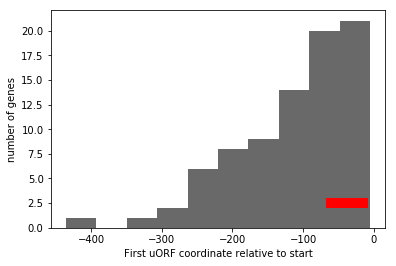

35.4% of uORF starts are in the -60 to -15 window for waiting SSUs (indicated by the red line in the graph)
18.3% of uORF starts are outside the -200 limit used in the analyses


In [4]:
uORF_positions=pd.read_csv('_Data/An_uORF_positions.csv')

plt.hist(uORF_positions['uORF_pos'],color='Dimgrey')
plt.plot((-15,-60),(2.5,2.5),linewidth=10,c='red')
plt.ylabel('number of genes')
plt.xlabel('First uORF coordinate relative to start')
#plt.savefig('uORF_positions_in_waiting_SSU_genes.svg')
plt.show()


proportion_in_window = uORF_positions.loc[uORF_positions['uORF_pos'] > -60]['uORF_pos'].count() / uORF_positions['uORF_pos'].count() * 100
proportion_outside_reference = uORF_positions.loc[uORF_positions['uORF_pos'] < -200]['uORF_pos'].count() / uORF_positions['uORF_pos'].count() * 100
print("{:4.1f}".format(proportion_in_window) + '% of uORF starts are in the -60 to -15 window for waiting SSUs '
      '(indicated by the red line in the graph)')
print("{:4.1f}".format(proportion_outside_reference) + '% of uORF starts are outside the ' 
      '-200 limit used in the analyses')